<font size="6"><strong>Data Scientist Technical Test - CIMB Niaga<strong></font>

<div style="text-align: justify">
This notebook serves as technical test for Data Scientist position at CIMB Niaga. The deadline was in 2 days from the day when the dataset and detailed task were received. The test includes SQL multiple choice questions and this data science test.
</div>

# Project Goal

<div style="text-align: justify">
Building a multi-class classification machine learning model to predict the loan rate category based on the features provided in the dataset with model accuracy level minimum of 70-80%.
</div>

# Dataset Information

In [1]:
# Importing packages for data wrangling and visualization purposes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset given had already been splitted: Train.csv & Test.csv

## Train Dataset

In [2]:
# Load the dataset
df = pd.read_csv("D:/Docs for Job Application/Tes/CIMB Niaga/Loan Interest Rate v2/Train.csv")
# Brief information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

The initial dataset was consists of 164309 data with 14 columns. Based on the file given, here are the definitions of columns:

| No. | Column Name | Definition |
| :---: | :--- | :--- |
| 1 | Loan_ID | Unique identifier (ID) for each loan. |
| 2 | Loan_Amount_Requested | The listed amount of the loan applied for by the borrower. |
| 3 | Length_Employed | Employment length in years. |
| 4 | Home_Owner | The home ownership status provided by the borrower during registration. Values are: Rent, Own, Mortgage, Other. |
| 5 | Annual_Income | The annual income provided by the borrower during registration. |
| 6 | Income_Verified | Indicates if income was verified, not verified, or if the income source was verified. |
| 7 | Purpose_of_Loan | A category provided by the borrower for the loan request. |
| 8 | Debt_to_Income | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income. |
| 9 | Inquiries_Last_6Mo | The number of inquiries by creditors during the past 6 months. |
| 10 | Months_Since_Delinquency | The number of months since the borrower's last delinquency. |
| 11 | Number_Open_Accounts | The number of open credit lines in the borrower's credit file. |
| 12 | Total_Accounts | The total number of credit lines currently in the borrower's credit file. |
| 13 | Gender | Gender of the borrower. |
| 14 | Interest_Rate | Target Variable: Interest Rate category (1/2/3) of the loan application. |
    

In [3]:
# Checking for 5 initial data from the dataset
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


## Test Dataset

In [4]:
# Load the dataset
tes = pd.read_csv("D:/Docs for Job Application/Tes/CIMB Niaga/Loan Interest Rate v2/Test.csv")
# Brief information of the dataset
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  109541 non-null  int64  
 1   Loan_Amount_Requested    109541 non-null  object 
 2   Length_Employed          104605 non-null  object 
 3   Home_Owner               92830 non-null   object 
 4   Annual_Income            92643 non-null   float64
 5   Income_Verified          109541 non-null  object 
 6   Purpose_Of_Loan          109541 non-null  object 
 7   Debt_To_Income           109541 non-null  float64
 8   Inquiries_Last_6Mo       109541 non-null  int64  
 9   Months_Since_Deliquency  50682 non-null   float64
 10  Number_Open_Accounts     109541 non-null  int64  
 11  Total_Accounts           109541 non-null  int64  
 12  Gender                   109541 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 10.9+ MB


In [5]:
tes.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


<div style="text-align: justify">
The test dataset have missing values and didn't have interest rate column. I won't explore this dataset because I assume that this dataset doesn't exist until I already made the model. I will only clean it. Since test data came with the same format as the training data, we need to create a comprehensive pipeline that applies for both dataset (and future unseen data).
</div>

# Data Cleaning

<div style="text-align: justify">
In this step, initial data exploration was performed. It aims to identify and treat wrong data types, duplicates, missing values, and anomalies within the dataset.
</div>

## Duplicates

Our dataset came with unique identifier column, let's check whether we have duplicates from that column.

In [6]:
# Checking for the amount of unique values
df['Loan_ID'].nunique()

164309

In [7]:
# Checking for the amount of unique values
tes['Loan_ID'].nunique()

109541

<div style="text-align: justify">
The number of unique values matches the number of rows, indicating that there was no duplicate data from the dataset.
</div>

## Wrong Data Types

### Loan_Amount_Requested

Based on column definition, this column should be a numerical one, not an object (characters). 

In [8]:
# Checking for the column datatype
df['Loan_Amount_Requested'].dtypes # 'O' for Object

dtype('O')

In [9]:
# Checking for the data
df['Loan_Amount_Requested'][0:5]

0     7,000
1    30,000
2    24,725
3    16,000
4    17,000
Name: Loan_Amount_Requested, dtype: object

I need to remove the comma from each data, then assign it as a numerical (int/float) column.

In [10]:
# Checking for the max and min length of characters
max_train = 0 # Default max value to be replaced
min_train = 100 # Default min value to be replaced
max_test = 0
min_test = 100
# Train
for i in df['Loan_Amount_Requested']:
    if len(i) > max_train:
        max_train = len(i)
    elif len(i) < min_train:
        min_train = len(i)
# Test
for j in tes['Loan_Amount_Requested']:
    if len(j) > max_test:
        max_test = len(j)
    elif len(j) < min_test:
        min_test = len(j)

In [11]:
max_train, min_train, max_test, min_test

(6, 3, 6, 3)

In [12]:
# Creating an empty list to contain the correct values
correct_df = []
correct_tes = []

# Looping correction for train
for i in df['Loan_Amount_Requested']:
    i=i.split(',') # Splitting the data using comma, transforming it as a list
    if len(i) > 1: # For 6 characters
        i=i[0]+i[1]
    elif len(i) == 1: # For 3 characters
        i=i[0]
    correct_df.append(i) # Inserting i to correct list

# Looping correction for test
for i in tes['Loan_Amount_Requested']:
    i=i.split(',') # Splitting the data using comma, transforming it as a list
    if len(i) > 1: # For 6 characters
        i=i[0]+i[1]
    elif len(i) == 1: # For 3 characters
        i=i[0]
    correct_tes.append(i) # Inserting i to correct list    

In [13]:
# Inserting new values to the column
df['Loan_Amount_Requested']=correct_df
tes['Loan_Amount_Requested']=correct_tes
# Changing the data type of the column
df['Loan_Amount_Requested']=df['Loan_Amount_Requested'].astype(float)
tes['Loan_Amount_Requested']=tes['Loan_Amount_Requested'].astype(float)

In [14]:
# Checking the distribution of the column
df['Loan_Amount_Requested'].describe()

count    164309.00000
mean      14349.33692
std        8281.86870
min         500.00000
25%        8000.00000
50%       12075.00000
75%       20000.00000
max       35000.00000
Name: Loan_Amount_Requested, dtype: float64

In [15]:
# Checking the change in test dataset
tes['Loan_Amount_Requested'].head()

0    27500.0
1    26000.0
2     6075.0
3    12000.0
4    35000.0
Name: Loan_Amount_Requested, dtype: float64

### Length_Employed

In [16]:
# Checking for datatype
df['Length_Employed'].dtypes # 'O' for Object

dtype('O')

In [17]:
# Checking for unique values
df['Length_Employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

The data have less than 1 year (< 1 year) and more than 10 years (10+ years) categorization, thus explaining the object data type of this column.

## Missing Values

In [18]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent],axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = (mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2))

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [19]:
missing_values_table(df)

Your selected dataframe has 14 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Months_Since_Deliquency,88379,53.79
Home_Owner,25349,15.43
Annual_Income,25102,15.28
Length_Employed,7371,4.49


In [20]:
missing_values_table(tes)

Your selected dataframe has 13 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Months_Since_Deliquency,58859,53.73
Annual_Income,16898,15.43
Home_Owner,16711,15.26
Length_Employed,4936,4.51


### Type of Missing Values

First, I want to confirm the type of missing values from these columns.

<AxesSubplot:>

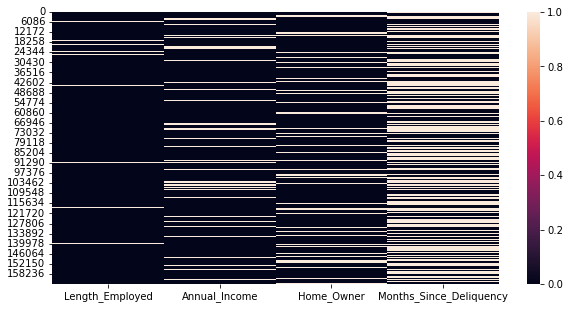

In [21]:
# Creating heatmap of missing values
plt.figure(figsize=(10,5))
sns.heatmap(df[['Length_Employed','Annual_Income','Home_Owner','Months_Since_Deliquency']].isna())

From the heatmap above, it seems that the missing data at training dataset were missing completely at random (MCAR).

### Length_Employed & Annual_Income & Home_Owner

We have several options to consider for these missing values:
1. Deleting the observations: the quickest way, however will reduce the amount of data.
2. Median or Mode Imputer: the 2nd quickest way, however it will change the data distribution and reducing the variance.
3. Iterative Imputer: using model to fill the missing values.
4. Manual: Searching the pattern/associations between columns manually to help us filling the missing values.

<div style="text-align: justify">
In most of my data science projects, I usually try to fill the missing value with manual approach. However, due to time limitation of this project,I will try the iterative imputer which is faster than manual approach and also avoid the 'lazy'-kind of imputer. The main reason to use iterative imputer is that logically, we have several columns that will help each other to fill the missing values. Increase in duration of employment usually followed by increase in annual income; the amount annual income also usually indirectly affects the home ownership status of someone.
</div>

To successfully fill all of the missing values, I will add other complete numerical value(s) to the iterative imputer.

In [22]:
# Selecting the complete numerical values based on Spearman correlation
df[['Annual_Income','Debt_To_Income','Loan_Amount_Requested','Number_Open_Accounts','Total_Accounts']].corr(method='spearman')

,Annual_Income,Debt_To_Income,Loan_Amount_Requested,Number_Open_Accounts,Total_Accounts
Annual_Income,1.000000,-0.197558,0.492922,0.243814,0.341377
Debt_To_Income,-0.197558,1.000000,0.071675,0.320092,0.238470
Loan_Amount_Requested,0.492922,0.071675,1.000000,0.220147,0.248760
Number_Open_Accounts,0.243814,0.320092,0.220147,1.000000,0.672742
Total_Accounts,0.341377,0.238470,0.248760,0.672742,1.000000


From the correlation matrix, we can see that annual income has a strong relationship [[1]]("https://www.researchgate.net/figure/Interpretation-Table-of-Spearman-Rank-Order-Correlation-Coefficients_tbl1_267339455miss") to the loan amount requested. Thus, we will use Loan_Amount_Requested column to help us fill the missing values.

#### Training Dataset

Since two of our columns with missing values are categorical, we will use MissForest imputer. [[2]]("https://towardsdatascience.com/missforest-the-best-missing-data-imputation-algorithm-4d01182aed3") [[3]]("https://pypi.org/project/missingpy/")

In [23]:
!pip install sklearn
!pip install missingpy

In [24]:
# Libraries for MissForest
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
# Encoding purpose
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [25]:
# Selecting data to impute
x = df[['Annual_Income','Loan_Amount_Requested','Length_Employed','Home_Owner']]


# Mapping for categorical data
ordinal_mapping_length=[{'col':'Length_Employed',
                 'mapping':{'< 1 year':0, '1 year':1, '2 years':2, '3 years':3,
                            '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8,
                            '9 years':9, '10+ years':10}}]
ordinal_mapping_home=[{'col':'Home_Owner',
                 'mapping':{'None':None,'Rent':0, 'Own':1, 'Mortgage':2, 'Other':3}}]

# Transforming/Encoding the categorical data
transformer = ColumnTransformer([
    ('ordinal1',ce.OrdinalEncoder(mapping=ordinal_mapping_home, handle_missing='return_nan', handle_unknown='return_nan'),['Home_Owner']),
    ('ordinal2',ce.OrdinalEncoder(mapping=ordinal_mapping_length, handle_missing='return_nan', handle_unknown='return_nan'),['Length_Employed'])
], remainder='passthrough')
x_preprocessed=pd.DataFrame(transformer.fit_transform(x))

In [26]:
# Checking the encoding result
x_preprocessed.columns=['Home_Owner','Length_Employed','Annual_Income','Loan_Amount_Requested']
x_preprocessed.head()

,Home_Owner,Length_Employed,Annual_Income,Loan_Amount_Requested
0,0.0,0.0,68000.0,7000.0
1,2.0,4.0,NaN,30000.0
2,2.0,7.0,75566.4,24725.0
3,NaN,0.0,56160.0,16000.0
4,1.0,8.0,96000.0,17000.0


In [27]:
# Checking with the initial data
x.head()

,Annual_Income,Loan_Amount_Requested,Length_Employed,Home_Owner
0,68000.0,7000.0,< 1 year,Rent
1,NaN,30000.0,4 years,Mortgage
2,75566.4,24725.0,7 years,Mortgage
3,56160.0,16000.0,< 1 year,NaN
4,96000.0,17000.0,8 years,Own


In [28]:
# Changing datatypes into category
x_preprocessed['Length_Employed']=x_preprocessed.Length_Employed.astype('category')
x_preprocessed['Home_Owner']=x_preprocessed.Home_Owner.astype('category')

In [29]:
# Get indices of categorical features
cat_cols = [x_preprocessed.columns.get_loc(col) for col in x_preprocessed.select_dtypes(['category']).columns.tolist()]
cat_cols

[0, 1]

In [30]:
# Creating imputer
imputer = MissForest(criterion=('squared_error','gini'),random_state=10)

# Impute missing values
imputed = imputer.fit_transform(x_preprocessed, cat_vars=cat_cols)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7


In [31]:
imputed = pd.DataFrame(imputed, columns=x_preprocessed.columns.tolist())
imputed.head()

,Home_Owner,Length_Employed,Annual_Income,Loan_Amount_Requested
0,0.0,0.0,68000.000000,7000.0
1,2.0,4.0,118642.192102,30000.0
2,2.0,7.0,75566.400000,24725.0
3,2.0,0.0,56160.000000,16000.0
4,1.0,8.0,96000.000000,17000.0


In [32]:
missing_values_table(imputed)

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [33]:
df['Home_Owner']=imputed['Home_Owner']
df['Length_Employed']=imputed['Length_Employed']
df['Annual_Income']=round(imputed['Annual_Income'],0)

In [34]:
missing_values_table(df)

Your selected dataframe has 14 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Months_Since_Deliquency,88379,53.79


#### Test Dataset

In [35]:
# Selecting data to impute
x = tes[['Annual_Income','Loan_Amount_Requested','Length_Employed','Home_Owner']]


# Mapping for categorical data
ordinal_mapping_length=[{'col':'Length_Employed',
                 'mapping':{'< 1 year':0, '1 year':1, '2 years':2, '3 years':3,
                            '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8,
                            '9 years':9, '10+ years':10}}]
ordinal_mapping_home=[{'col':'Home_Owner',
                 'mapping':{'None':None,'Rent':0, 'Own':1, 'Mortgage':2, 'Other':3}}]

# Transforming/Encoding the categorical data
transformer = ColumnTransformer([
    ('ordinal1',ce.OrdinalEncoder(mapping=ordinal_mapping_home, handle_missing='return_nan', handle_unknown='return_nan'),['Home_Owner']),
    ('ordinal2',ce.OrdinalEncoder(mapping=ordinal_mapping_length, handle_missing='return_nan', handle_unknown='return_nan'),['Length_Employed'])
], remainder='passthrough')
x_preprocessed=pd.DataFrame(transformer.fit_transform(x))

In [36]:
# Checking the encoding result
x_preprocessed.columns=['Home_Owner','Length_Employed','Annual_Income','Loan_Amount_Requested']
x_preprocessed.head()

,Home_Owner,Length_Employed,Annual_Income,Loan_Amount_Requested
0,2.0,10.0,129000.0,27500.0
1,NaN,10.0,110000.0,26000.0
2,0.0,0.0,75000.0,6075.0
3,2.0,10.0,73000.0,12000.0
4,2.0,0.0,156000.0,35000.0


In [37]:
# Changing datatypes into category
x_preprocessed['Length_Employed']=x_preprocessed.Length_Employed.astype('category')
x_preprocessed['Home_Owner']=x_preprocessed.Home_Owner.astype('category')

In [38]:
# Creating imputer
imputer = MissForest(criterion=('squared_error','gini'),random_state=10)

# Impute missing values
imputed = imputer.fit_transform(x_preprocessed, cat_vars=cat_cols)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [39]:
imputed = pd.DataFrame(imputed, columns=x_preprocessed.columns.tolist())
imputed.head()

,Home_Owner,Length_Employed,Annual_Income,Loan_Amount_Requested
0,2.0,10.0,129000.0,27500.0
1,1.0,10.0,110000.0,26000.0
2,0.0,0.0,75000.0,6075.0
3,2.0,10.0,73000.0,12000.0
4,2.0,0.0,156000.0,35000.0


In [40]:
missing_values_table(imputed)

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [41]:
tes['Home_Owner']=imputed['Home_Owner']
tes['Length_Employed']=imputed['Length_Employed']
tes['Annual_Income']=round(imputed['Annual_Income'],0)

In [42]:
missing_values_table(tes)

Your selected dataframe has 13 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Months_Since_Deliquency,58859,53.73


### Months_Since_Deliquency

<div style="text-align: justify">
Based on its column definition, it is most likely that missing values indicate users with no history of delinquency. Thus, we won't delete the missing observations, we will proceed with initial feature engineering procedure for this column.
</div>

In [43]:
df['Months_Since_Deliquency'].describe()

count    75930.000000
mean        34.229356
std         21.761180
min          0.000000
25%         16.000000
50%         31.000000
75%         50.000000
max        180.000000
Name: Months_Since_Deliquency, dtype: float64

Subjectively, I will categorize this feature into: Recent (0-3 months), Less than year (4-11 months), 1-2 years (12-24 months), >2-3 years (25-36 months), >3-5 years (37-60 months), Longer (>60 months). The Nan value will be replaced with 'No Delinquency'.

In [44]:
def change_delinquency(i):
    if i in range(0,4):
        return 'Recent'
    elif i in range(4,12):
        return 'Less than year, not recent'
    elif i in range(12,25):
        return '1-2 years'
    elif i in range(25,37):
        return '>2-3 years'
    elif i in range(37,61):
        return '>3-5 years'
    elif i > 60:
        return 'Longer'
    else:
        return 'No Delinquency'

In [45]:
df['Delinquency_Record']=df['Months_Since_Deliquency'].apply(lambda x: change_delinquency(x))
tes['Delinquency_Record']=tes['Months_Since_Deliquency'].apply(lambda x: change_delinquency(x))

In [46]:
print(df['Delinquency_Record'].unique())
tes['Delinquency_Record'].unique()

['No Delinquency' '1-2 years' 'Longer' 'Less than year, not recent'
 '>2-3 years' '>3-5 years' 'Recent']


array(['Longer', 'No Delinquency', '>2-3 years', '1-2 years',
       '>3-5 years', 'Less than year, not recent', 'Recent'], dtype=object)

In [47]:
df.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed                0
Home_Owner                     0
Annual_Income                  0
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
Delinquency_Record             0
dtype: int64

## Cardinality

In [48]:
object_columns = list(df.select_dtypes(include="object").columns)+['Home_Owner','Length_Employed']

for column in object_columns:
    print("{} has {} unique values."
          .format(column, df[column].nunique()))

Income_Verified has 3 unique values.
Purpose_Of_Loan has 14 unique values.
Gender has 2 unique values.
Delinquency_Record has 7 unique values.
Home_Owner has 4 unique values.
Length_Employed has 11 unique values.


## Summary

1. From the initial data cleaning process, we didn't drop any columns, yet.
2. Missing values were recovered using Iterative Imputer for mix data types: MissForest.
3. Feature engineering (categorization) was done to Months_Since_Delinquency column to facilitate the information of users with no Delinquency Record.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  float64
 2   Length_Employed          164309 non-null  float64
 3   Home_Owner               164309 non-null  float64
 4   Annual_Income            164309 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
 14  Deli

In [50]:
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  109541 non-null  int64  
 1   Loan_Amount_Requested    109541 non-null  float64
 2   Length_Employed          109541 non-null  float64
 3   Home_Owner               109541 non-null  float64
 4   Annual_Income            109541 non-null  float64
 5   Income_Verified          109541 non-null  object 
 6   Purpose_Of_Loan          109541 non-null  object 
 7   Debt_To_Income           109541 non-null  float64
 8   Inquiries_Last_6Mo       109541 non-null  int64  
 9   Months_Since_Deliquency  50682 non-null   float64
 10  Number_Open_Accounts     109541 non-null  int64  
 11  Total_Accounts           109541 non-null  int64  
 12  Gender                   109541 non-null  object 
 13  Delinquency_Record       109541 non-null  object 
dtypes: f

# Exploratory Data Analysis (EDA)

EDA was performed to help us understand the characteristics of label and features and their correlation to each others. In this step, we can gain insights that will help the business decision-making or strategies, also how to do further feature engineering and/or data preprocessing procedures.

## How is the proportion of interest rate in the dataset?

<AxesSubplot:xlabel='Interest_Rate', ylabel='count'>

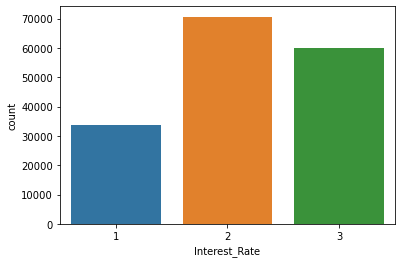

In [51]:
# Barplot of flag_bad
sns.countplot(data=df,x='Interest_Rate')

Most people were labeled as interest_rate 2. From the graph above, it is clear that the dataset was imbalanced.

## Does the duration of employment affect the amount of annual salary?

<AxesSubplot:xlabel='Length_Employed', ylabel='Annual_Income'>

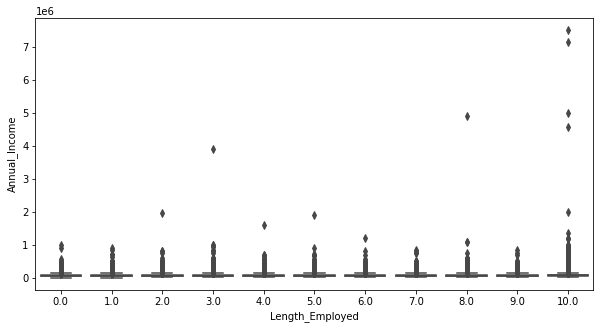

In [52]:
# Creating boxplot
plt.figure(figsize=(10,5))
sns.boxplot(y='Annual_Income',x='Length_Employed',data=df)

From the presence of outliers, the annual income data is absolutely not normally distributed. For now, let's ignore the outliers for better boxplot visualization.

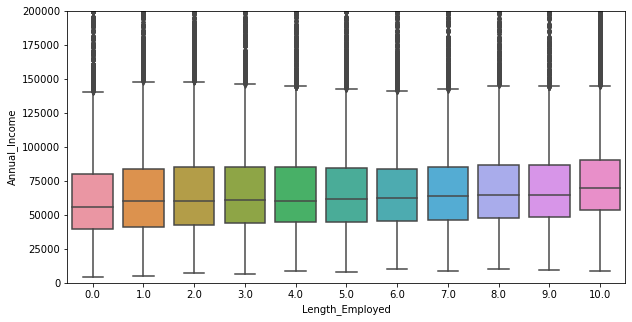

In [53]:
# Creating boxplot
plt.figure(figsize=(10,5))
sns.boxplot(y='Annual_Income',x='Length_Employed',data=df)
plt.ylim(0,0.2e6)
plt.show()

In [54]:
# Checking for details in number for the boxplot
detail=df.groupby('Length_Employed')['Annual_Income'].describe().reset_index()
detail

,Length_Employed,count,mean,std,min,25%,50%,75%,max
0,0.0,13469.0,66029.649417,42580.332824,4000.0,40000.00,56000.0,80303.0,1000000.0
1,1.0,10780.0,68570.196289,43363.123309,4800.0,41000.00,60000.0,84000.0,897000.0
2,2.0,15199.0,69958.567340,46059.728818,7500.0,42726.00,60000.0,85000.0,1950000.0
3,3.0,13424.0,71601.349672,56930.364806,6400.0,44130.25,61000.0,85046.0,3900000.0
4,4.0,10084.0,70492.105117,45092.149191,9000.0,45000.00,60490.0,85000.0,1600000.0
5,5.0,11140.0,70904.450269,46132.839029,8000.0,45000.00,61485.0,84230.0,1900000.0
6,6.0,9334.0,71359.473430,43049.322577,10000.0,45432.50,62324.0,84000.0,1200000.0
7,7.0,9569.0,72122.449368,43043.840049,8500.0,46500.00,64000.0,85000.0,831000.0
8,8.0,8103.0,74166.021720,70743.352144,10000.0,48000.00,64540.0,87000.0,4900000.0
9,9.0,6439.0,73405.538127,43183.180033,9732.0,48379.50,65000.0,87000.0,850000.0


<div style="text-align: justify">
Interestingly, we can clearly see that the increase in employment duration also lead to increase in the median of annual income. Now, let's check using hypothesis testing procedure for more objective view.
</div>

<div style="text-align: justify">
Because Length_Employed has more than 2 groups, we can use Kruskal-Wallis test for difference in median to test whether there are differences of annual income between groups. However, because we are interested in comparison between each groups or its pairwise comparisons, let's use conover posthoc test instead. The hypothesis:
    
    Null hypothesis (H0): There are no difference of annual income between groups.
    Alternative hypothesis (H1): There are difference of annual income between groups.
</div>

<AxesSubplot:>

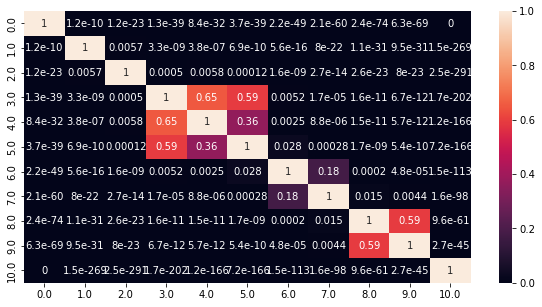

In [55]:
# Package for posthocs test
import scikit_posthocs as sp
# Making heatmap from the pairwise comparison results
plt.figure(figsize=(10,5))
table=sp.posthoc_conover(df, val_col='Annual_Income', group_col='Length_Employed', 
                         p_adjust = 'fdr_bh') # Bonferroni correction was used due to multiplicity problem in multiple hypothesis testing
sns.heatmap(table, annot=True)

<div style="text-align: justify">
Since the pairwise comparisons have a lot of statistically significant values, using Kruskal-Wallis will absolutely resulting in statistically significant results. Now, from the heatmap above, we can clearly see that there are several groups that didn't really differ to each others (p-value >= 0.05). Based on the information above, we can further simplify the class of length employed column into: < 1 year, 1 year, 2 years, 3-5 years, 6-7 years, 8-9 years and 10+ years.
</div>

## Does the amount of annual salary affect the requested loan amount?

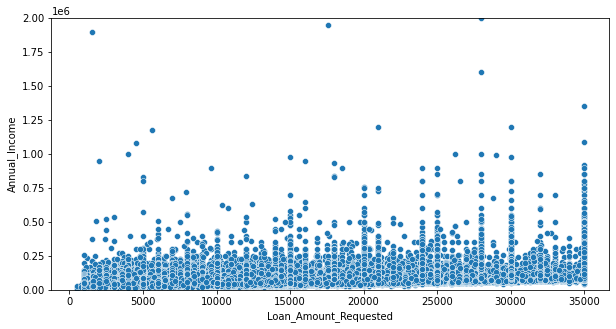

In [56]:
# Creating scatterplot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, y='Annual_Income', x='Loan_Amount_Requested')
plt.ylim(0,2e6)
plt.show()

There are too much data, let's zoom in.

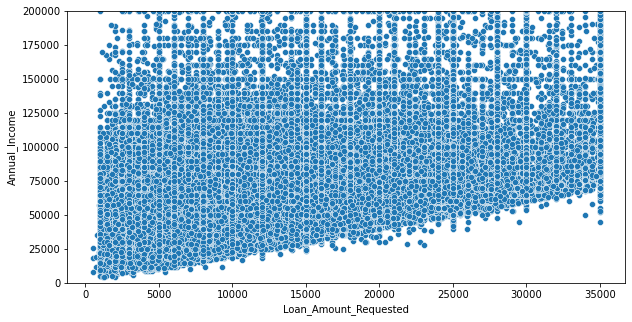

In [57]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, y='Annual_Income', x='Loan_Amount_Requested')
plt.ylim(0,0.2e6)
plt.show()

From the scatterplot above, it is clear that increase in annual income also lead to increase in the base value of loan amount requested.

## Does the delinquency records affect the interest rate?

In [58]:
# Heatmap of percentage proportion
plt.figure(figsize=(10,5))
mapping=pd.crosstab(df['Interest_Rate'],df['Delinquency_Record'],normalize='columns')
mapping

Delinquency_Record,1-2 years,>2-3 years,>3-5 years,"Less than year, not recent",Longer,No Delinquency,Recent
Interest_Rate,,,,,,,
1,0.140911,0.157450,0.165685,0.126329,0.170562,0.251112,0.138122
2,0.440669,0.445546,0.444862,0.454969,0.443767,0.416773,0.415285
3,0.418420,0.397004,0.389452,0.418702,0.385671,0.332115,0.446593


<Figure size 720x360 with 0 Axes>

In [59]:
# Ordering
mapping=mapping[['Recent','Less than year, not recent','1-2 years','>2-3 years','>3-5 years','Longer','No Delinquency']]

<AxesSubplot:xlabel='Delinquency_Record', ylabel='Interest_Rate'>

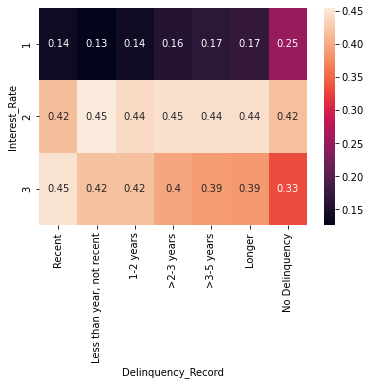

In [60]:
# Heatmap
sns.heatmap(mapping, annot=True)

1. From the heatmap above, I can say that Interest Rate 1 was given to the users with less risk. It can be seen that the proportion of no delinquency in this class is higher than the others, the longer the delinquency record, the higher the proportion of interest rate 0 compared to other groups.
2. Most of the people labeled in Interest Rate 2, aka users with reasonable risk. The proportions are comparable between groups.
3. Interest Rate 3 were given to users with high risk of insolvency, because the lowest proportion is in no delinquency group, the recent the delinquency record, the higher the proportion compared to other groups.

## Does purpose of loan affect the amount of loan requested?

In [61]:
# Ordering by median
order=df.groupby(by=["Purpose_Of_Loan"])["Loan_Amount_Requested"].median().reset_index().sort_values('Loan_Amount_Requested',ascending=False)
my_order=order['Purpose_Of_Loan']

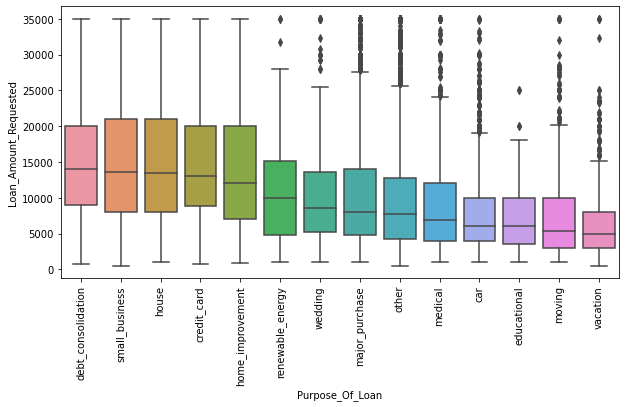

In [62]:
# Creating boxplot
plt.figure(figsize=(10,5))
sns.boxplot(y='Loan_Amount_Requested',x='Purpose_Of_Loan',data=df, order=my_order)
plt.xticks(rotation=90)
plt.show()

Several purposes of loan has higher amount of loan requested than the others.

## Does the amount of annual income affects the home ownership status?

In [63]:
def plot_distribution(df, target, column_values, column_name):
  # funtion to print distribution of a continuous variable
  # for categorical data

  for value in column_values:
      subset = df[df[column_name] == value]
      g = sns.kdeplot(subset[target],
                      label=value,
                      linewidth=3)

  # set title, legends and labels
  plt.ylabel("Density", size=14)
  plt.xlabel("{}".format(target), size=14)
  plt.title("Distribution of {} per {}"
            .format(target, column_name), size=16)

  return g

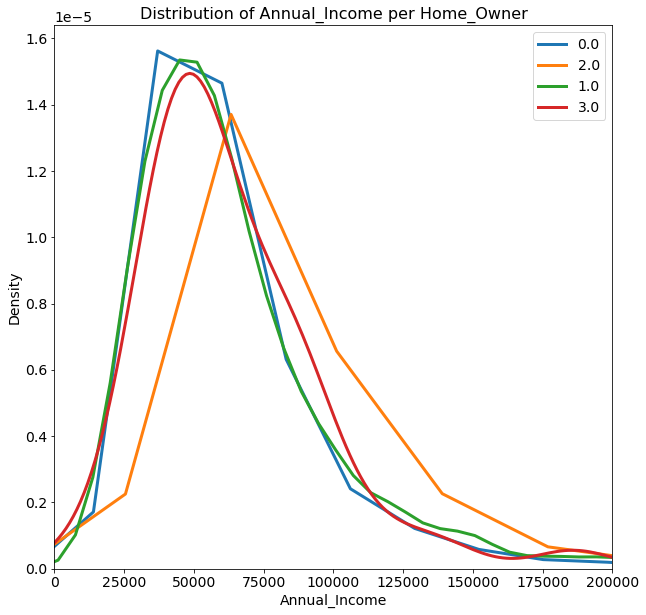

In [64]:
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 14

values=df['Home_Owner'].unique()

# plot points distribution for most frequent countries
plot_distribution(df, "Annual_Income",
                  values, "Home_Owner")
plt.xlim(0,0.2e6)
plt.legend()
plt.show()

Mortgage status have higher annual income compared to others. Others are comparable to each others. Or in another words, someone with higher annual income will have a tendency to buy houses. My assumption is that they already have a home, but buying another using mortgage.

## Does debt to income ratio affects the interest rate?

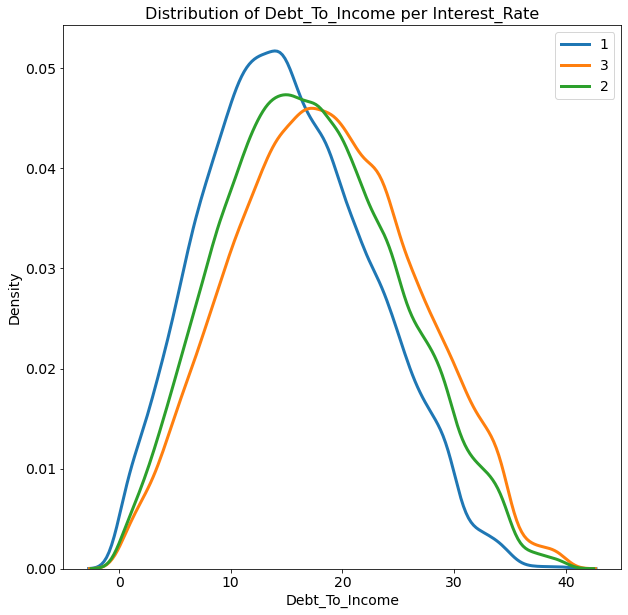

In [65]:
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 14

values=df['Interest_Rate'].unique()

# plot points distribution for most frequent countries
plot_distribution(df, "Debt_To_Income",
                  values, "Interest_Rate")
plt.legend()
plt.show()

The graph above further proves the assumption in delinquency record. Interest rate 1 was given to low risk users with lower debt to income ratio compared to other groups. Interest rate 2 for the mediocre. Interest rate 3 was given to high risk users with higher debt to income ratio compared to other groups.

## Does gender affect the debt to income ratio?

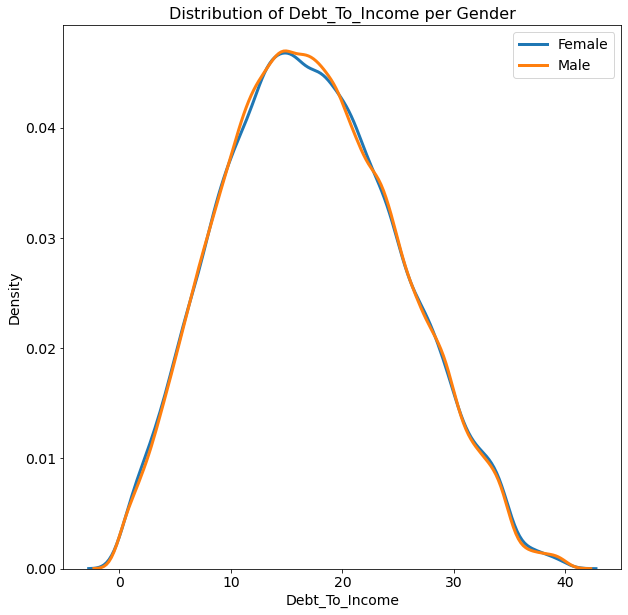

In [66]:
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 14

values=df['Gender'].unique()

# plot points distribution for most frequent countries
plot_distribution(df, "Debt_To_Income",
                  values, "Gender")
plt.legend()
plt.show()

Nope.

## Does gender affect the annual income?

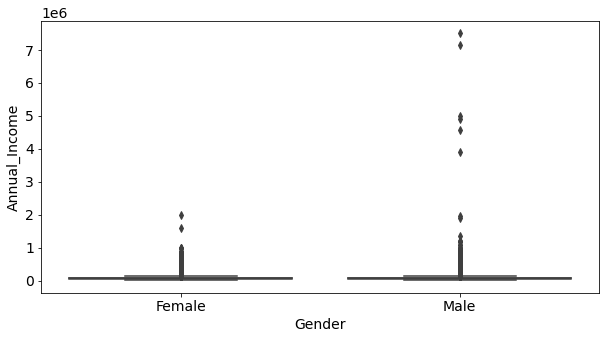

In [67]:
# Creating boxplot
plt.figure(figsize=(10,5))
sns.boxplot(y='Annual_Income',x='Gender',data=df)
plt.show()

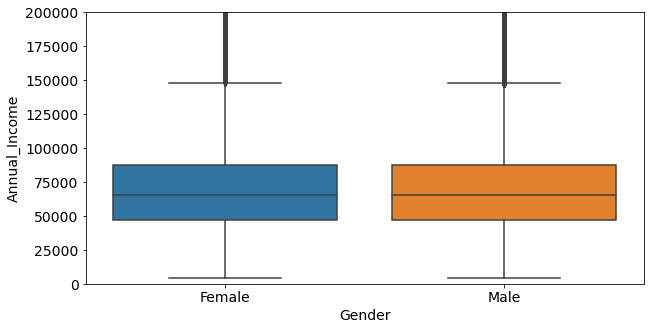

In [68]:
# Creating boxplot
plt.figure(figsize=(10,5))
sns.boxplot(y='Annual_Income',x='Gender',data=df)
plt.ylim(0,0.2e6)
plt.show()

Nope. But there are several observation of outliers of male gender with higher annual salary compared to the max value of female annual salary.

## Does the amount of credit accounts affect the debt to income ratio?

### Total Credit Accounts

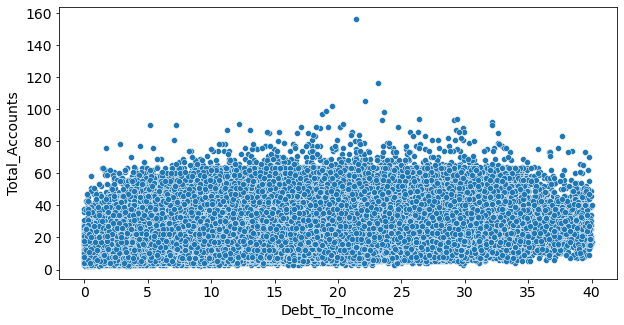

In [69]:
# Create scatterplot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, y='Total_Accounts', x='Debt_To_Income')
plt.show()

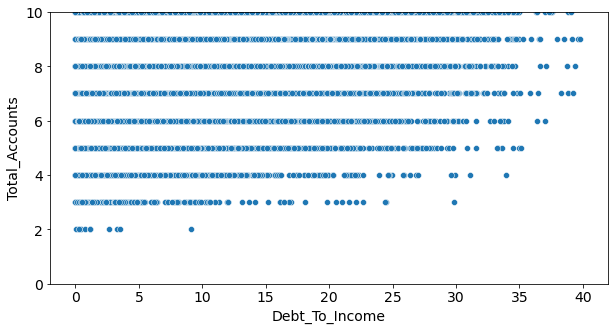

In [70]:
# Create scatterplot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, y='Total_Accounts', x='Debt_To_Income')
plt.ylim(0,10)
plt.show()

Increase in the total of credit accounts followed by increase in base value of debt to income.

### Number of Open Accounts

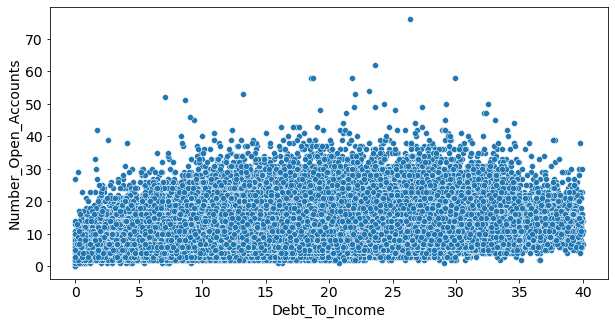

In [71]:
# Create scatterplot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, y='Number_Open_Accounts', x='Debt_To_Income')
plt.show()

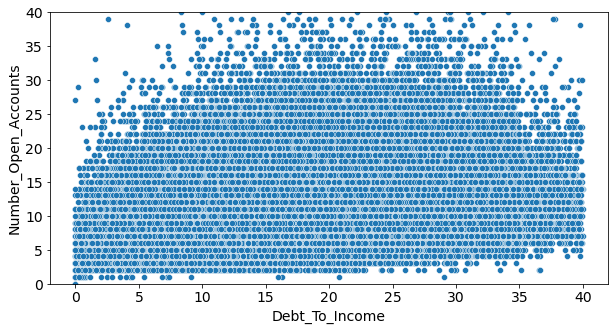

In [72]:
# Create scatterplot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, y='Number_Open_Accounts', x='Debt_To_Income')
plt.ylim(0,40)
plt.show()

The same thing with open account, but with more visible pattern.

## Does the amount of annual incomes affect the interest rate?

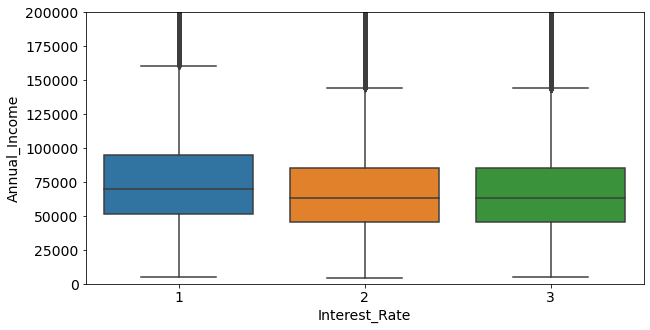

In [73]:
# Creating boxplot
plt.figure(figsize=(10,5))
sns.boxplot(y='Annual_Income',x='Interest_Rate',data=df)
plt.ylim(0,0.2e6)
plt.show()

Interest rate 1 has higher median of annual income compared to interest rate 2 and 3.

## Does verification of annual income affect the interest rate?

<AxesSubplot:xlabel='Income_Verified', ylabel='Interest_Rate'>

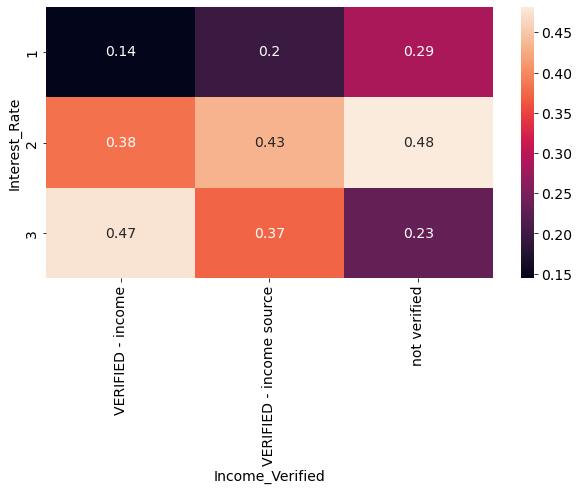

In [74]:
# Heatmap of percentage proportion
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df['Interest_Rate'],df['Income_Verified'],normalize='columns'),annot=True)

In [75]:
def change(i):
    if i == 'VERIFIED - income' or i == 'VERIFIED - income source':
        return 'Verified'
    else:
        return 'Not Verified'
df['Income_Verified']=df['Income_Verified'].apply(lambda x: change(x))

<AxesSubplot:xlabel='Income_Verified', ylabel='Interest_Rate'>

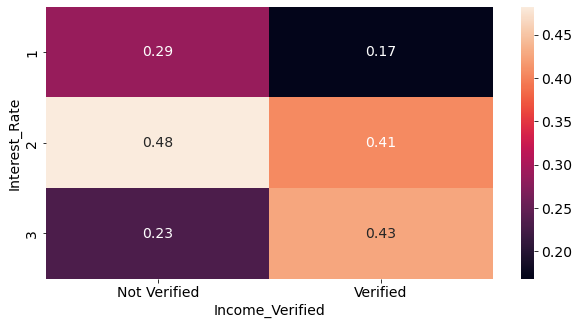

In [76]:
# Heatmap of percentage proportion
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df['Interest_Rate'],df['Income_Verified'],normalize='columns'),annot=True)

The verified data means that the data is valid. Logically, the validity of data didn't affect the risk level, the characteristics did. This data is one of the example of 'association didn't mean causation'. Briefly, from the heatmap above, in the dataset, verified status has more high risk users, compared to not verified status.  Based on this information, I will drop this data from prediction model.

## Does number of credit inquiries in last 6 month affect the interest rate?

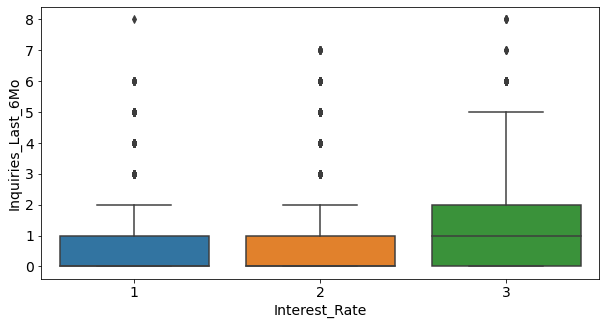

In [77]:
# Creating boxplot
plt.figure(figsize=(10,5))
sns.boxplot(y='Inquiries_Last_6Mo',x='Interest_Rate',data=df)
plt.show()

More credit inquiries maybe indicate that there were sign of insolvency from the borrowers, observed by the creditor.

# Features Selection and Engineering

## Features Elimination

Based on EDA process, let's drop the unnecessary columns:

In [78]:
df.drop(columns=['Loan_ID','Income_Verified','Months_Since_Deliquency'], inplace=True)
tes.drop(columns=['Loan_ID','Income_Verified','Months_Since_Deliquency'], inplace=True)

## Simplification of Length_Employed

<div style="text-align: justify">
Based on the information in EDA section, we can further simplify the class of length employed column into: < 1 year, 1 year, 2 years, 3-5 years, 6-7 years, 8-9 years and 10+ years.
</div>

In [79]:
# Creating function
def change(i):
    if i==3 or i==4 or i ==5:
        return 3
    elif i==6 or i==7:
        return 4
    elif i==8 or i==9:
        return 5
    elif i==10:
        return 6
    else:
        return i

In [80]:
# Applying function to create new column based on Length_Employed column
df['Employment_Duration']=df['Length_Employed'].apply(lambda x: change(x))
tes['Employment_Duration']=tes['Length_Employed'].apply(lambda x: change(x))

In [81]:
# Checking the new column
df['Employment_Duration'].unique()

array([0., 3., 4., 5., 2., 6., 1.])

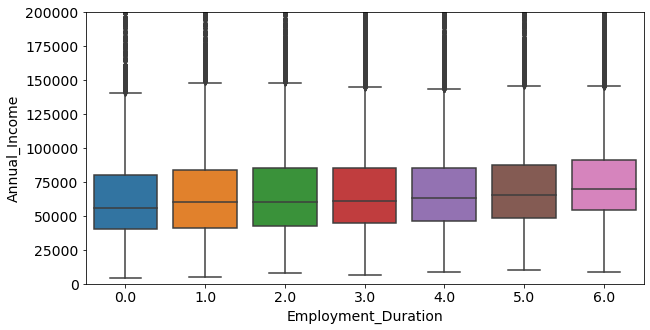

In [82]:
# Creating boxplot
plt.figure(figsize=(10,5))
sns.boxplot(y='Annual_Income',x='Employment_Duration',data=df)
plt.ylim(0,0.2e6)
plt.show()

In [83]:
# Checking for details in number for the boxplot
df.groupby('Employment_Duration')['Annual_Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Employment_Duration,,,,,,,,
0.0,13469.0,66029.649417,42580.332824,4000.0,40000.0,56000.0,80303.0,1000000.0
1.0,10780.0,68570.196289,43363.123309,4800.0,41000.0,60000.0,84000.0,897000.0
2.0,15199.0,69958.567340,46059.728818,7500.0,42726.0,60000.0,85000.0,1950000.0
3.0,34648.0,71054.447068,50317.353783,6400.0,45000.0,61000.0,85000.0,3900000.0
4.0,18903.0,71745.704015,43047.098880,8500.0,46000.0,63000.0,85000.0,1200000.0
5.0,14542.0,73829.289919,60118.753471,9732.0,48000.0,65000.0,87000.0,4900000.0
6.0,56768.0,79252.766911,68896.693352,8520.0,54000.0,70000.0,90650.0,7500000.0


<AxesSubplot:>

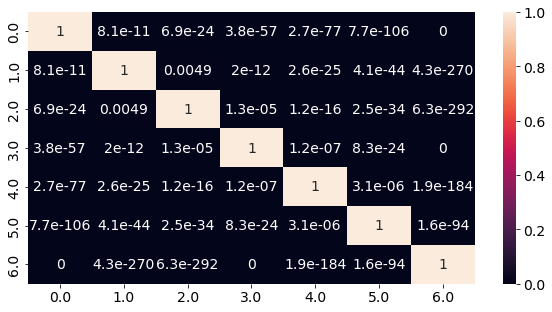

In [84]:
# Checking for clear distinction between groups (statistically)
plt.figure(figsize=(10,5))
table=sp.posthoc_conover(df, val_col='Annual_Income', group_col='Employment_Duration', 
                         p_adjust = 'fdr_bh') # Bonferroni correction was used due to multiplicity problem in multiple hypothesis testing
sns.heatmap(table, annot=True)

<div style="text-align: justify">
With more depth grouping procedure based on statistic evidence, the groups of Employment Duration are now statistically distinct to each others based on Annual Income values.
</div>

## Multicollinearity of Numerical Features

We can detect multicollinearity using variance inflation factor (VIF).
1. 1 = not correlated.
2. Between 1 and 5 = moderately correlated.
3. Greater than 5 = highly correlated. [[4]]("https://www.statisticshowto.com/variance-inflation-factor/")

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = df[['Annual_Income', 'Debt_To_Income', 'Loan_Amount_Requested', 'Number_Open_Accounts', 'Total_Accounts', 'Inquiries_Last_6Mo']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature        VIF
0          Annual_Income   3.110258
1         Debt_To_Income   5.009057
2  Loan_Amount_Requested   4.491174
3   Number_Open_Accounts  11.498267
4         Total_Accounts  10.832279
5     Inquiries_Last_6Mo   1.566407


We can see that number of open accounts and total accounts are highly correlated to each other. Let's combine the columns:

In [86]:
# This new column will indicate the proportion of open credit line from the total credit line of the borrowers
# This column will contain the combined information from both columns
df['Open_Per_Total_Acc']=df['Number_Open_Accounts']/df['Total_Accounts']
tes['Open_Per_Total_Acc']=tes['Number_Open_Accounts']/tes['Total_Accounts']

In [87]:
df.drop(columns=['Number_Open_Accounts','Total_Accounts'], inplace=True)
tes.drop(columns=['Number_Open_Accounts','Total_Accounts'], inplace=True)

# Data Splitting

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
df.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Gender', 'Interest_Rate', 'Delinquency_Record',
       'Employment_Duration', 'Open_Per_Total_Acc'],
      dtype='object')

In [90]:
x=df.drop(columns=['Interest_Rate','Length_Employed'])
y=df['Interest_Rate']

In [93]:
x_train, x_test, y_train, y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=2020)

# Data Preprocessing

In [94]:
from sklearn.compose import ColumnTransformer

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

In [95]:
df.describe()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Interest_Rate,Employment_Duration,Open_Per_Total_Acc
count,164309.00000,164309.000000,164309.000000,1.643090e+05,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000
mean,14349.33692,6.030881,1.131873,7.353578e+04,17.207189,0.781698,2.158951,3.858900,0.484739
std,8281.86870,3.640759,0.949874,5.652843e+04,7.845083,1.034747,0.738364,1.983313,0.172165
min,500.00000,0.000000,0.000000,4.000000e+03,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8000.00000,3.000000,0.000000,4.700000e+04,11.370000,0.000000,2.000000,3.000000,0.358974
50%,12075.00000,6.000000,2.000000,6.500000e+04,16.840000,0.000000,2.000000,4.000000,0.464286
75%,20000.00000,10.000000,2.000000,8.737900e+04,22.780000,1.000000,3.000000,6.000000,0.590909
max,35000.00000,10.000000,3.000000,7.500000e+06,39.990000,8.000000,3.000000,6.000000,1.000000


We will use **robust scaler** for several columns due to the presence of outliers: Loan_Amount_Requested, Annual_Income, Debt_To_Income.

In [96]:
df.describe(include='object')

,Purpose_Of_Loan,Gender,Delinquency_Record
count,164309,164309,164309
unique,14,2,7
top,debt_consolidation,Male,No Delinquency
freq,97101,117176,88379


Let's use **one hot encoder** for all the categorical columns. It will be easier for us to see the features importances later.

In [97]:
transformer = ColumnTransformer([
    ('robust', RobustScaler(),['Loan_Amount_Requested','Annual_Income','Debt_To_Income']),
    ('onehot', OneHotEncoder(drop='first'),['Purpose_Of_Loan','Gender','Delinquency_Record'])
], remainder = 'passthrough')

# Handling Imbalance in Dataset

Data imbalance will surely affect the model result. Because we are interested in all class of interest rate, then we will use several resampling methods as comparison: **oversampling** method - SMOTE [[5]]("https://machinelearningmastery.com/multi-class-imbalanced-classification/"); **undersampling** method - NearMiss [[6]]("https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/"); and the **combination** of both of them - SMOTETomek [[7]]("https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/").

In [98]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [99]:
smote=SMOTE()
nearmiss=NearMiss()
smotomek = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

# Evaluation Metrics

As I said before, we are interested in all class of interest rate. Thus, I will use ROC-AUC as evaluation metric. [[8]]("https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/")

In [100]:
from sklearn.metrics import SCORERS
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'top_k_accuracy': make_scorer(top_k_accuracy_score, ne

# Crossvalidation

This procedure will help us in selecting the best classifier to be our predictive model.

## Models

For classification model, logistic regression will represents the basic method of model-based classification, K-Nearest Neighbor will represents the instance-based classification, while Random Forest and XGBoost will represents tree-based classification (ensemble model).

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [102]:
model_logreg = LogisticRegression(random_state=10)
model_knn= KNeighborsClassifier()
model_xgbc= XGBClassifier(random_state=10)
model_forest= RandomForestClassifier(random_state=10)

## Pipeline

In [103]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline

In [127]:
estimator_withoutresampling=Pipeline([
    ('preprocess',transformer),
    ('model',model_xgbc)
])

In [105]:
estimator_smote=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',model_xgbc)
])

In [106]:
estimator_nearmiss=Pipeline([
    ('preprocess',transformer),
    ('resampling',nearmiss),
    ('model',model_xgbc)
])

In [107]:
estimator_smotomek=Pipeline([
    ('preprocess',transformer),
    ('resampling',smotomek),
    ('model',model_xgbc)
])

In [108]:
hyperparam_space={
    'model':[model_logreg,model_xgbc,model_knn,model_forest]
}

## Model Without Resampling

In [143]:
skfold=StratifiedKFold(n_splits=3)
grid=GridSearchCV(
    estimator_withoutresampling,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='roc_auc_ovo', # OVO for one-vs-one comparison, OVR for one-vs-rest comparison
    n_jobs=-1
)

In [144]:
grid.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('robust',
                                                                         RobustScaler(),
                                                                         ['Loan_Amount_Requested',
                                                                          'Annual_Income',
                                                                          'Debt_To_Income']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Purpose_Of_Loan',
                                                  

In [145]:
pd.DataFrame(grid.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,{'model': LogisticRegression(random_state=10)},0.680228,0.001051,2
1,"{'model': XGBClassifier(base_score=None, boost...",0.697081,0.000315,1
2,{'model': KNeighborsClassifier()},0.605888,0.000954,4
3,{'model': RandomForestClassifier(random_state=...,0.669419,0.001013,3


## Model With Oversampling

In [112]:
skfold=StratifiedKFold(n_splits=3)
grid2=GridSearchCV(
    estimator_smote,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='roc_auc_ovo',
    n_jobs=-1
)

In [113]:
grid2.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:17:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('robust',
                                                                         RobustScaler(),
                                                                         ['Loan_Amount_Requested',
                                                                          'Annual_Income',
                                                                          'Debt_To_Income']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Purpose_Of_Loan',
                                                  

In [115]:
pd.DataFrame(grid2.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,{'model': LogisticRegression(random_state=10)},0.682936,0.000911,2
1,"{'model': XGBClassifier(base_score=None, boost...",0.693417,0.000425,1
2,{'model': KNeighborsClassifier()},0.604276,0.001770,4
3,{'model': RandomForestClassifier(random_state=...,0.669808,0.001217,3


## Model With Undersampling

In [116]:
skfold=StratifiedKFold(n_splits=3)
grid3=GridSearchCV(
    estimator_nearmiss,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='roc_auc_ovo',
    n_jobs=-1
)

In [117]:
grid3.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('robust',
                                                                         RobustScaler(),
                                                                         ['Loan_Amount_Requested',
                                                                          'Annual_Income',
                                                                          'Debt_To_Income']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Purpose_Of_Loan',
                                                  

In [119]:
pd.DataFrame(grid3.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,{'model': LogisticRegression(random_state=10)},0.630210,0.000628,1
1,"{'model': XGBClassifier(base_score=None, boost...",0.613096,0.000781,2
2,{'model': KNeighborsClassifier()},0.582603,0.000111,4
3,{'model': RandomForestClassifier(random_state=...,0.607379,0.001605,3


### Model With Over- and Undersampling

In [121]:
skfold=StratifiedKFold(n_splits=3)
grid4=GridSearchCV(
    estimator_smotomek,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='roc_auc_ovo',
    n_jobs=-1
)

In [122]:
grid4.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:56:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('robust',
                                                                         RobustScaler(),
                                                                         ['Loan_Amount_Requested',
                                                                          'Annual_Income',
                                                                          'Debt_To_Income']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Purpose_Of_Loan',
                                                  

In [123]:
pd.DataFrame(grid4.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,{'model': LogisticRegression(random_state=10)},0.682891,0.000890,2
1,"{'model': XGBClassifier(base_score=None, boost...",0.693558,0.001373,1
2,{'model': KNeighborsClassifier()},0.603057,0.001360,4
3,{'model': RandomForestClassifier(random_state=...,0.669733,0.001799,3


## Results

From the models comparison above, we saw that data imbalance didn't affect the model performance, thus explaining why there is no improvement of model performance even after using resampling methods. Thus, we will proceed with optimizing the parameters of the model.

## Performance in Test Data

Before tuning the parameters, we will use XGBoost model without resampling method to test its performance in test data.

In [146]:
estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', model_xgbc)])
estimator.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:15:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust', RobustScaler(),
                                                  ['Loan_Amount_Requested',
                                                   'Annual_Income',
                                                   'Debt_To_Income']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Purpose_Of_Loan', 'Gender',
                                                   'Delinquency_Record'])])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                           

In [147]:
y_pred=estimator.predict(x_test)
y_proba=estimator.predict_proba(x_test)

In [149]:
classes = estimator.classes_
classes

array([1, 2, 3], dtype=int64)

In [152]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovo')

0.7018404073613219

Increase of ROC AUC value in test data, from 0.697 in training data.

## Graph ROC-AUC OvO

Source: [[9]]("https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb")

In [184]:
def calculate_tpr_fpr(y_test, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    from sklearn.metrics import confusion_matrix
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [185]:
def get_all_roc_coordinates(y_test, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_test, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [186]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [187]:
classes_combinations = []
class_list = list(classes)
for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        classes_combinations.append([class_list[i], class_list[j]])
        classes_combinations.append([class_list[j], class_list[i]])
classes_combinations

[[1, 2], [2, 1], [1, 3], [3, 1], [2, 3], [3, 2]]

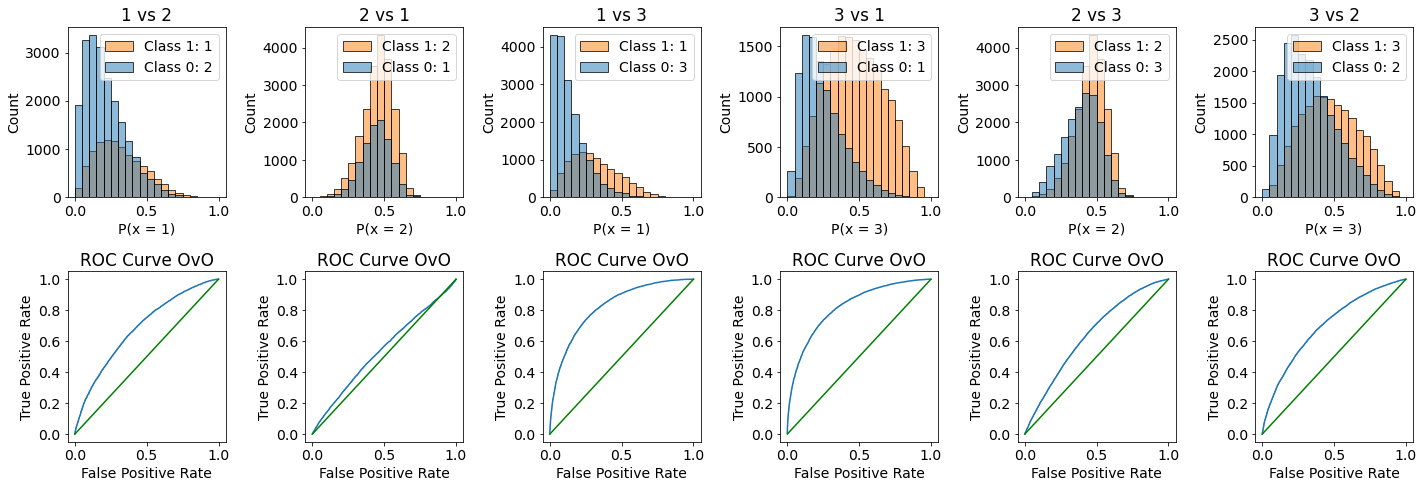

In [189]:
# Plots the Probability Distributions and the ROC Curves One vs One
plt.figure(figsize = (20, 7))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovo = {}

for i in range(len(classes_combinations)):
    # Gets the class
    comb = classes_combinations[i]
    c1 = comb[0]
    c2 = comb[1]
    c1_index = class_list.index(c1)
    title = c1.astype('str') + " vs " +c2.astype('str')
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = x_test.copy()
    df_aux = pd.DataFrame(df_aux)
    df_aux['class'] = y_test
    df_aux['prob'] = y_proba[:, c1_index]
    
    # Slices only the subset with both classes
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(title)
    ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
    ax.set_xlabel(f"P(x = {c1})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 6, i+7)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvO")
    
    # Calculates the ROC AUC OvO
    roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [191]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovo:
    avg_roc_auc += roc_auc_ovo[k]
    i += 1
    print(f"{k} ROC AUC OvO: {roc_auc_ovo[k]:.15f}")
print(f"average ROC AUC OvO: {avg_roc_auc/i:.15f}")

1 vs 2 ROC AUC OvO: 0.682954068846541
2 vs 1 ROC AUC OvO: 0.542593365389331
1 vs 3 ROC AUC OvO: 0.822372110216381
3 vs 1 ROC AUC OvO: 0.819522594477988
2 vs 3 ROC AUC OvO: 0.643745855817078
3 vs 2 ROC AUC OvO: 0.699854449420612
average ROC AUC OvO: 0.701840407361322


The difference can be seen clearly between class 1 and class 3. Because the position of class 2 located in between of class 1 and class 3, lower ROC AUC values were observed between class 2 vs others.

# Hyperparamater Tuning

Can we improve the model by modifying the parameter of model? [[10]]("https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook")

## Gridsearch

In [200]:
hyperparam_space={
    'model__max_depth':[5,10,15,20], # The depth of trees, default=None
    'model__n_estimators':[60,80,100], # The amount of trees generated, default=100
    'model__learning_rate':[0.01,0.1,0.2,0.3], # Model learning rate, boosting/weighting parameter, default=0.3
    'model__eval_metric':['merror','logloss','auc'], # Selecting eval metrics for multiclass problem
    'model__verbosity':[2] # For info
}

In [201]:
skfold=StratifiedKFold(n_splits=3)
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='roc_auc_ovo',
    n_jobs=-1
)

In [202]:
grid_search.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:52:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:52:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:52:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:52:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:52:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:52:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 

[21:52:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:52:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:52:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[21:52:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:52:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:52:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 

[21:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[21:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[21:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 

[21:52:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:52:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[21:52:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[21:52:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:52:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[21:52:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 

[21:52:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[21:52:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[21:52:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:52:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[21:52:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[21:52:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 

[21:52:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:52:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[21:52:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[21:52:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:52:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[21:52:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('robust',
                                                                         RobustScaler(),
                                                                         ['Loan_Amount_Requested',
                                                                          'Annual_Income',
                                                                          'Debt_To_Income']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Purpose_Of_Loan',
                                               

In [203]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score',ascending=True).head()

,params,mean_test_score,std_test_score,rank_test_score
74,"{'model__eval_metric': 'logloss', 'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__verbosity': 2}",0.700139,0.000667,1
122,"{'model__eval_metric': 'auc', 'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__verbosity': 2}",0.700139,0.000667,1
26,"{'model__eval_metric': 'merror', 'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__verbosity': 2}",0.700139,0.000667,1
85,"{'model__eval_metric': 'logloss', 'model__learning_rate': 0.3, 'model__max_depth': 5, 'model__n_estimators': 80, 'model__verbosity': 2}",0.700065,0.000583,4
37,"{'model__eval_metric': 'merror', 'model__learning_rate': 0.3, 'model__max_depth': 5, 'model__n_estimators': 80, 'model__verbosity': 2}",0.700065,0.000583,4


In [204]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7001385388824457
{'model__eval_metric': 'merror', 'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__verbosity': 2}


## Performance in Test Data

{'model__eval_metric': 'merror', 'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 100}

In [205]:
best_model=grid_search.best_estimator_
best_model.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:53:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 

[21:53:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[21:53:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 

[21:53:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:53:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[21:53:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[21:53:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 

[21:53:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[21:53:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[21:53:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:53:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:53:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[21:53:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 

[21:53:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:53:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[21:53:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[21:53:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:53:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 

[21:53:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[21:53:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[21:53:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[21:53:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:53:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust', RobustScaler(),
                                                  ['Loan_Amount_Requested',
                                                   'Annual_Income',
                                                   'Debt_To_Income']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Purpose_Of_Loan', 'Gender',
                                                   'Delinquency_Record'])])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample...
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.2, max_delta_step=0, max_depth=5,


In [208]:
y_pred=best_model.predict(x_test)
y_proba=best_model.predict_proba(x_test)

In [209]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovo')

0.7024962393149625

With hyperparameter tuning, there is a slight increase of performance in training and test dataset.

| Type | Train | Test |
| :---: | :---: | :---: |
| Pre-tuning | 0.6970 | 0.7018 |
| Post-tuning | 0.7001 | 0.7024 |

## Graph ROC-AUC OvO

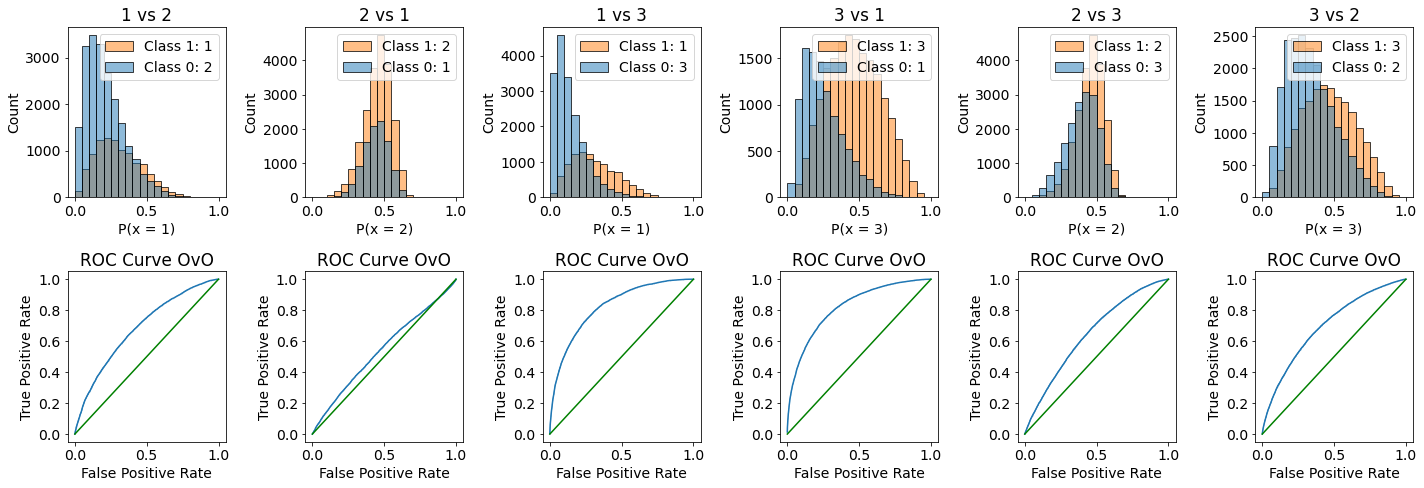

In [211]:
# Plots the Probability Distributions and the ROC Curves One vs One
plt.figure(figsize = (20, 7))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovo = {}

for i in range(len(classes_combinations)):
    # Gets the class
    comb = classes_combinations[i]
    c1 = comb[0]
    c2 = comb[1]
    c1_index = class_list.index(c1)
    title = c1.astype('str') + " vs " +c2.astype('str')
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = x_test.copy()
    df_aux = pd.DataFrame(df_aux)
    df_aux['class'] = y_test
    df_aux['prob'] = y_proba[:, c1_index]
    
    # Slices only the subset with both classes
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(title)
    ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
    ax.set_xlabel(f"P(x = {c1})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 6, i+7)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvO")
    
    # Calculates the ROC AUC OvO
    roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [213]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovo:
    avg_roc_auc += roc_auc_ovo[k]
    i += 1
    print(f"{k} ROC AUC OvO: {roc_auc_ovo[k]:.15f}")
print(f"average ROC AUC OvO: {avg_roc_auc/i:.15f}")

1 vs 2 ROC AUC OvO: 0.683909934488961
2 vs 1 ROC AUC OvO: 0.543934266037736
1 vs 3 ROC AUC OvO: 0.821652202736275
3 vs 1 ROC AUC OvO: 0.819155021007967
2 vs 3 ROC AUC OvO: 0.647833195748444
3 vs 2 ROC AUC OvO: 0.698492815870393
average ROC AUC OvO: 0.702496239314963


**Pre-tuning result**  
1 vs 2 ROC AUC OvO: 0.682954068846541  
2 vs 1 ROC AUC OvO: 0.542593365389331  
1 vs 3 ROC AUC OvO: 0.822372110216381  
3 vs 1 ROC AUC OvO: 0.819522594477988  
2 vs 3 ROC AUC OvO: 0.643745855817078  
3 vs 2 ROC AUC OvO: 0.699854449420612  
average ROC AUC OvO: 0.701840407361322  

# Features Importance

In [228]:
features=list(transformer.transformers_[0][1].get_feature_names_out())+list(transformer.transformers_[1][1].get_feature_names_out())+['Home_Owner','Inquiries_Last_6Mo','Employment_Duration','Open_Per_Total_Acc']

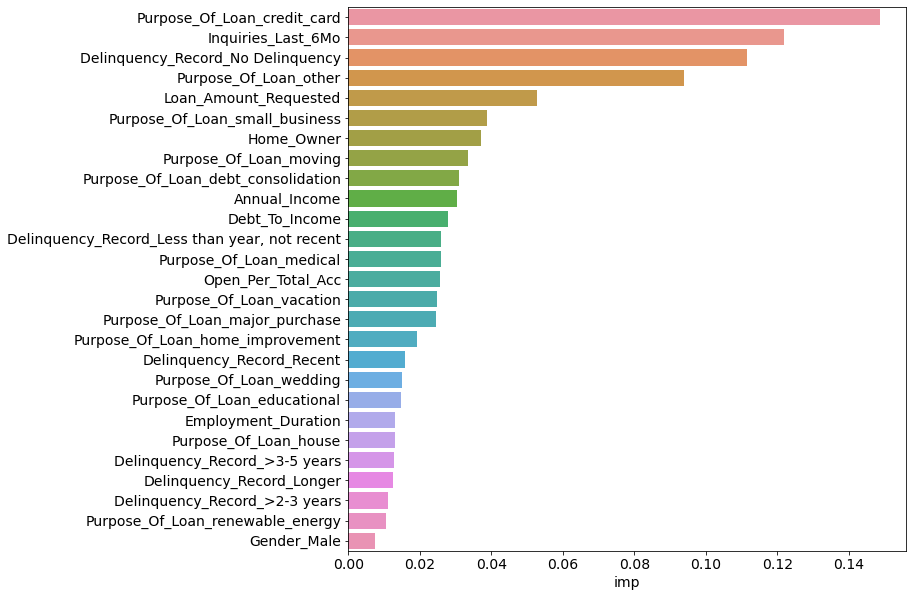

In [237]:
plt.figure(figsize=(10,10))
sns.barplot(data=importance_table.sort_values(by='imp', ascending=False), 
            x='imp', y=importance_table.sort_values(by='imp', ascending=False).index)
plt.show()

Our model top 5 features importance were Purpose of Loan - Credit Card, Number of Inquiries in Last 6 Months, Delinquency Record - No Delinquency, Purpose of Loan - Other, and Loan Amount Requested.

# Conclusions

Based on the result above, I acquired a prediction model using XGBoost classifier with average value of ROC-AUC OvO of approximately 0.70 or 70% which is barely acceptable. 

To improve the model, I tried to use several resampling methods and hyperparameter tuning procedure. However, the model performance didn't significantly improved. Looking back at the feature selection and engineering process, I only delete 1 column (Income Verified), recategorize the unique values of column to be more simple based on statistical evidence (Length Employed), and merging columns because of multicollinearity, vif values (Total Accounts & Number Open Accounts). Thus, I already maximize the informations from features to be included in the prediction model building process. 

Looking at the ROC-AUC OvO curves produced, to improve the model, I believe that new features need to be introduced into the prediction model that have informations that will make a clear distinction between interest rate 2 vs interest rate 1/3.

# References

[1] https://www.researchgate.net/figure/Interpretation-Table-of-Spearman-Rank-Order-Correlation-Coefficients_tbl1_267339455miss  
[2] https://towardsdatascience.com/missforest-the-best-missing-data-imputation-algorithm-4d01182aed3  
[3] https://pypi.org/project/missingpy/  
[4] https://www.statisticshowto.com/variance-inflation-factor/  
[5] https://machinelearningmastery.com/multi-class-imbalanced-classification/  
[6] https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/  
[7] https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/  
[8] https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/  
[9] https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb  
[10] https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook